# Урок 3. kNN

В уроке мы разобрали построение модели kNN на базовом наборе данных Iris. Для лучшего понимания, как работает алгоритм, мы использовали только два признака - длину и ширину лепестка.

Однако другие признаки тоже могли быть важны для получения моделью более детальной информации об объектах и, соответственно, построения более точных прогнозов.

### 1.
Поочередно добавьте к признакам (petal length, petal width) из урока  оставшиеся признаки, чтобы получилось: 
1) (sepal length, petal length, petal width);
2) (sepal width, petal length, petal width).

*Примечание: признаки могут быть расположены в любом порядке.*

In [18]:
from sklearn.datasets import load_iris

Напомним порядок расположения признаков в массиве данных

In [19]:
iris_dataset = load_iris()
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# For iris_dataset_1, we need (sepal length, petal length, petal width) which corresponds to columns (0, 2, 3)
iris_dataset_1 = np.delete(iris_dataset.data, 1, axis=1)
df_iris_dataset_1 = pd.DataFrame(iris_dataset_1, columns=['sepal length', 'petal length', 'petal width'])

df_iris_dataset_1.columns


Index(['sepal length', 'petal length', 'petal width'], dtype='object')

In [21]:
# For iris_dataset_2, we need (sepal width, petal length, petal width) which corresponds to columns (1, 2, 3)
iris_dataset_2 = np.delete(iris_dataset.data, 0, axis=1)
df_iris_dataset_2 = pd.DataFrame(iris_dataset_2, columns=['sepal width', 'petal length', 'petal width'])

df_iris_dataset_2.columns


Index(['sepal width', 'petal length', 'petal width'], dtype='object')

### 2.
Теперь посмотрите на трехмерном графике, насколько хорошо данные разделяются по каждой из совокупностей трех параметров.

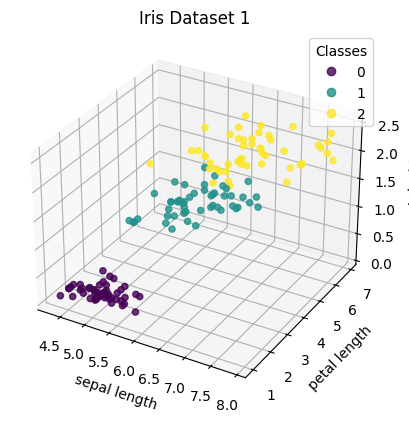

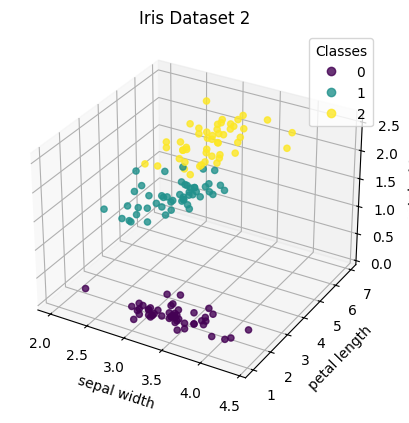

In [25]:
# First scatter plot
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')

xdata1 = df_iris_dataset_1['sepal length']
ydata1 = df_iris_dataset_1['petal length']
zdata1 = df_iris_dataset_1['petal width']
colors1 = iris_dataset.target

scatter1 = ax1.scatter3D(xdata1, ydata1, zdata1, alpha=.8, c=colors1)
ax1.set_xlabel('sepal length')
ax1.set_ylabel('petal length')
ax1.set_zlabel('petal width')
plt.legend(*scatter1.legend_elements(), title="Classes")
plt.title('Iris Dataset 1')
plt.show()

# Second scatter plot
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

xdata2 = df_iris_dataset_2['sepal width']
ydata2 = df_iris_dataset_2['petal length']
zdata2 = df_iris_dataset_2['petal width']
colors2 = iris_dataset.target

scatter2 = ax2.scatter3D(xdata2, ydata2, zdata2, alpha=.8, c=colors2)
ax2.set_xlabel('sepal width')
ax2.set_ylabel('petal length')
ax2.set_zlabel('petal width')
plt.legend(*scatter2.legend_elements(), title="Classes")
plt.title('Iris Dataset 2')
plt.show()

### 3.
С помощью функции sklearn.model_selection.train_test_split разделите данные на тренировочный и тестовый датасеты и затем, применив библиотечную версию алгоритма sklearn.neighbors.KNeighborsClassifier, постройте модель для наборов данных *iris_dataset_1* и *iris_dataset_2* (по умолчанию используйте n_neighbors=5).

*Примечание: в функции train_test_split используйте параметр random_state=17 для воспроизводимости результатов.*

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Splitting the data for iris_dataset_1
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_iris_dataset_1, colors1, test_size=0.2, random_state=17)

# Creating the model for iris_dataset_1
knn_1 = KNeighborsClassifier(n_neighbors=5)
knn_1.fit(X_train_1, y_train_1)

# Splitting the data for iris_dataset_2
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_iris_dataset_2, colors2, test_size=0.2, random_state=17)

# Creating the model for iris_dataset_2
knn_2 = KNeighborsClassifier(n_neighbors=5)
knn_2.fit(X_train_2, y_train_2)


KNeighborsClassifier()

### 4.
Проверьте точность работы обеих моделей, используя встроенную функцию sklearn.metrics.accuracy_score. Сравните результат их работы с результатом, полученным на наборе данных с двумя признаками (который разбирался в уроке), и укажите ответ.

In [29]:
from sklearn.metrics import accuracy_score
# Assuming that you have already trained models knn_1 and knn_2 using X_train_1, X_train_2 and corresponding y_train
# And y_test_1, y_test_2 are the true labels for the test sets

# Predict the labels for the test sets
y_pred_1 = knn_1.predict(X_test_1)
y_pred_2 = knn_2.predict(X_test_2)

# Calculate the accuracies
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
accuracy_2 = accuracy_score(y_test_2, y_pred_2)

print(f'Accuracy_1: {accuracy_1}, accuracy_2: {accuracy_2}')

Accuracy_1: 0.9666666666666667, accuracy_2: 0.9666666666666667


Сравним с метрикой из урока:
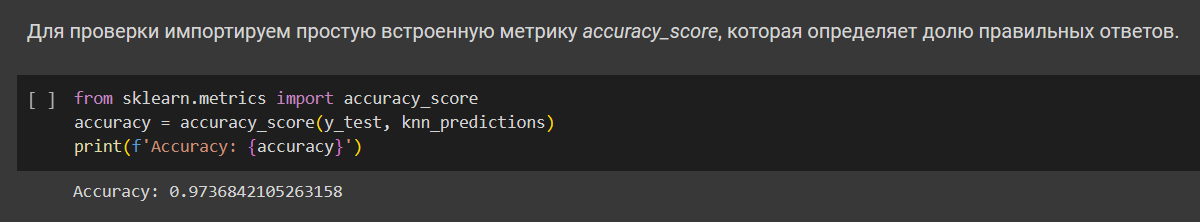

### 5.
Постройте модель на данных *x_train_1, y_train_1* с гиперпараметром n_neighbors, пробегающим значения от 1 до 20 включительно, и укажите значения n_neighbors, которым соответствует наиболее высокий результат функции accuracy_score().

*Примечание: можно воспользоваться циклом for, чтобы не прописывать вручную все 20 вариаций модели.*

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


best_accuracy = 0
best_n = 0

for n in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train_1, y_train_1)
    y_pred = model.predict(X_test_1)
    accuracy = accuracy_score(y_test_1, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n = n

print(f'Best accuracy: {best_accuracy}, best_n: {best_n}')

# Predict using the model with best_n
model = KNeighborsClassifier(n_neighbors=best_n)
model.fit(X_train_1, y_train_1)
y_pred = model.predict(X_test_1)

# Print the classification report
print(classification_report(y_test_1, y_pred))


Best accuracy: 0.9666666666666667, best_n: 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

